In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,528120170,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000
1,535179060,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
2,528138030,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
3,526355170,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
4,909452050,80,RL,NaN,13607,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000


In [3]:
#show all rows and cols rather than ... in the middle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#drop PID col
df.drop('PID', axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
4,80,RL,NaN,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000


### EDA

In [5]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


##### Look for missing values. Remove rows, impute values, etc. as appropriate

In [6]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       346
LotArea             0
Street              0
Alley            1918
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         19
MasVnrArea         19
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           59
BsmtCond           59
BsmtExposure       60
BsmtFinType1       59
BsmtFinSF1          1
BsmtFinType2       60
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
X1stFlrSF           0
X2ndFlrSF           0
LowQualFinSF        0
GrLivArea 

- LotFrontage: linear feet of street connected to property (maybe 0? Look further below)
- Alley: 1918 houses have no alley access (coded as NA)
- MasVnrType and Area: masonry veneer type (19 houses have none); not sure if the area is maybe 0 for the 19 houses?
- Basement (9 cols): 59 or 60 houses don't have basements (examine NAs for BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF)
- FireplaceQu: 1001 houses don't have fireplaces
- Garage (7 cols): 119 houses don't have garages; 1 missing value each for Cars and Area are something else...
- PoolQC: 4 levels of quality for pools; houses without pools are coded as NA, thus the 2042 missing values...
- Fence: 4 levels of fence quality; houses without fences are coded NA
- MiscFeature: a col for features not listed elsewhere; houses without extra features are coded NA

Check out NAs that aren't justified above and decide what to do with them
LotFrontage, MasVnrArea, GarageArea, GarageCars, BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, MasVnrType, MasVnrArea

In [7]:
df['LotFrontage'].describe()
#346 missing values. Mean ~= median; distribution has a pretty small spread with the exception of the high outlier(s)

count    1705.000000
mean       69.931965
std        23.516527
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

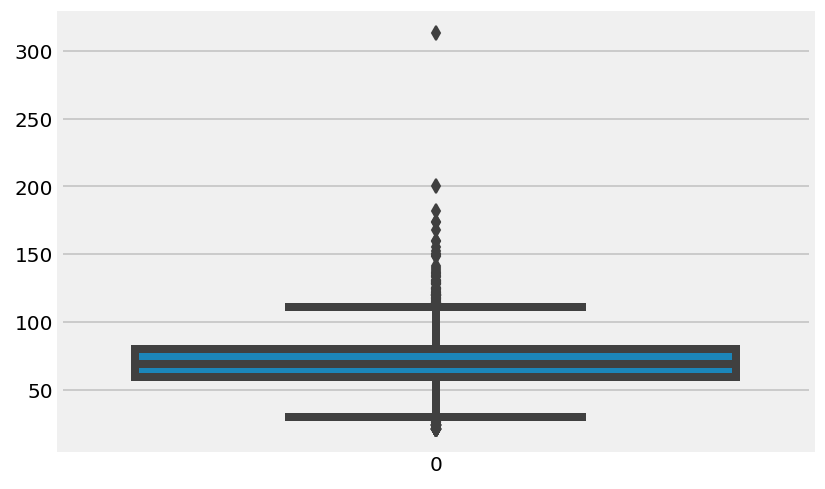

In [8]:
sns.boxplot(data = df['LotFrontage'])

In [9]:
#fill missing values with median (reduces variance but better than than deleting 15% of rows I think)
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['LotFrontage']

0        77.0
1        80.0
2        85.0
3        95.0
4        69.0
5        71.0
6        59.0
7       100.0
8        62.0
9        58.0
10       50.0
11       70.0
12       70.0
13       24.0
14      100.0
15       85.0
16       69.0
17       50.0
18       80.0
19       44.0
20       74.0
21       22.0
22       81.0
23       50.0
24       69.0
25       60.0
26       94.0
27      118.0
28       21.0
29       60.0
30       52.0
31       80.0
32       69.0
33       41.0
34       65.0
35       85.0
36      141.0
37       69.0
38       38.0
39       69.0
40      120.0
41       50.0
42      120.0
43       80.0
44       42.0
45       71.0
46      121.0
47       32.0
48      120.0
49      128.0
50       32.0
51       74.0
52       90.0
53       60.0
54       98.0
55       75.0
56       81.0
57       74.0
58       60.0
59       32.0
60       94.0
61       78.0
62       60.0
63       24.0
64       72.0
65       80.0
66       60.0
67       42.0
68       69.0
69       65.0
70       69.0
71    

In [10]:
df['LotFrontage'].describe()

count    2051.000000
mean       69.774744
std        21.443152
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

GarageYrBlt has 119 missing values but these are houses without garages I think

In [11]:
df['GarageYrBlt'].describe()

count    1932.000000
mean     1978.057971
std        25.793804
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [12]:
#Eyeballing it, YearBuilt and GarageYrBlt are almost identical. Their corr is 0.83 but it might be b/c of the NaN's?
df[['YearBuilt','GarageYrBlt']].head(5)

,YearBuilt,GarageYrBlt
0,2006,2006.0
1,1957,1957.0
2,2005,2005.0
3,1973,1973.0
4,1986,1986.0


In [13]:
df['YearBuilt'] - df['GarageYrBlt']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20       -1.0
21        0.0
22        0.0
23        0.0
24        0.0
25      -70.0
26      -18.0
27        0.0
28        0.0
29        0.0
30        NaN
31        0.0
32        0.0
33        0.0
34        0.0
35      -35.0
36        0.0
37        0.0
38        0.0
39        0.0
40     -100.0
41        0.0
42        0.0
43        0.0
44        0.0
45        0.0
46        0.0
47        0.0
48      -59.0
49        0.0
50        0.0
51        0.0
52        0.0
53        0.0
54        0.0
55        0.0
56        0.0
57        0.0
58        0.0
59        0.0
60        0.0
61        0.0
62        0.0
63        0.0
64        0.0
65        0.0
66       -5.0
67        0.0
68        0.0
69        0.0
70        0.0
71    

In [14]:
#the numeric cols don't have many missing values (a handful have 1 or 2, MasVnrArea has 19, GarageYrBlt has 119)
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2032.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.00000,2051.000000,2051.000000,2051.000000,1932.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.523159,69.774744,10274.220868,6.108727,5.560215,1971.361287,1983.920527,105.052165,442.270732,46.540488,563.333659,1052.144878,1164.096051,337.662604,5.481229,1507.239883,0.420205,0.061981,1.566065,0.378352,2.85763,1.044369,6.448562,0.600195,1978.057971,1.768293,473.738537,93.159434,46.743540,23.622136,2.822526,16.222818,2.014139,54.516821,6.194052,2007.793272,181524.847879
std,42.914365,21.443152,8481.882032,1.436247,1.113402,30.104657,20.994146,183.933104,448.592463,165.065855,438.030045,441.289162,396.033247,432.851334,51.225908,513.216615,0.516903,0.247180,0.544506,0.497995,0.80378,0.217483,1.580263,0.653008,25.793804,0.768759,219.084766,126.662226,65.106888,66.572345,26.605367,56.314800,32.693779,643.814839,2.680441,1.309319,82422.518806
min,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1964.000000,0.000000,0.000000,0.000000,219.000000,796.000000,882.500000,0.000000,0.000000,1124.000000,0.000000,0.000000,1.000000,0.000000,2.00000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129450.000000
50%,50.000000,69.000000,9520.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,371.500000,0.000000,474.500000,989.500000,1085.000000,0.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,3.00000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,79.000000,11637.000000,7.000000,6.000000,2000.000000,2004.000000,167.250000,737.000000,0.000000,816.000000,1302.000000,1391.500000,711.500000,0.000000,1760.500000,1.000000,0.000000,2.000000,1.000000,3.00000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2153.000000,5095.000000,5095.000000,2065.000000,1064.000000,5095.000000,2.000000,2.000000,3.000000,2.000000,8.00000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


##### Change data types from object to floats or dummies where applicable

In [15]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
4,80,RL,69.0,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000
5,60,RL,71.0,12209,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,2Story,6,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Ex,TA,No,ALQ,690.0,Unf,0.0,114.0,804.0,GasA,Ex,Y,SBrkr,804,1157,0,1961,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2001.0,Fin,2.0,560.0,TA,TA,Y,125,192,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
6,60,RL,59.0,16023,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,600.0,Gd,Ex,PConc,Ex,TA,Gd,GLQ,1218.0,Unf,0.0,180.0,1398.0,GasA,Ex,Y,SBrkr,1414,1384,0,2798,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,670.0,TA,TA,Y,182,37,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,457347
7,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1771,0,0,1771,0.0,0.0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2.0,336.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,115000
8,60,RL,62.0,8857,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,738.0,738.0,GasA,Ex,Y,SBrkr,738,757,0,1495,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,440.0,TA,TA,Y,100,30,0,0,0,0,NaN,NaN,NaN,0,3,2007,New,Partial,171925
9,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gi

In [16]:
#Pave or Grvl -->dummy
df['Street'].value_counts()

Pave    2040
Grvl      11
Name: Street, dtype: int64

In [17]:
#Pave or Grvl -->dummy
df['Alley'].value_counts()

Grvl    79
Pave    54
Name: Alley, dtype: int64

In [18]:
#Reg, IR1 2 and 3 --> 3 dummies?
df['LotShape'].value_counts()

Reg    1302
IR1     685
IR2      54
IR3      10
Name: LotShape, dtype: int64

In [19]:
#lvl, bnk, hls, low
df['LandContour'].value_counts()

Lvl    1840
Bnk      86
HLS      82
Low      43
Name: LandContour, dtype: int64

In [20]:
#inside, corner, culdsac, fr2, fr3
df['LotConfig'].value_counts()

Inside     1487
Corner      365
CulDSac     125
FR2          64
FR3          10
Name: LotConfig, dtype: int64

In [21]:
#Gtl, Mod, Sev
df['LandSlope'].value_counts()

Gtl    1953
Mod      87
Sev      11
Name: LandSlope, dtype: int64

In [22]:
# ~20 values...too many to make dummies right now
df['Neighborhood'].value_counts()

NAmes      317
CollgCr    186
OldTown    166
Edwards    133
Somerst    126
NridgHt    114
Gilbert    112
Sawyer     103
NWAmes      93
SawyerW     86
Mitchel     81
IDOTRR      75
Crawfor     70
BrkSide     69
NoRidge     56
Timber      51
StoneBr     34
ClearCr     32
SWISU       31
MeadowV     28
BrDale      21
Blmngtn     21
Veenker     18
NPkVill     17
Greens       6
Blueste      5
Name: Neighborhood, dtype: int64

#### Looking at the numeric data to see correlations, distributions, etc.

In [23]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2032.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.00000,2051.000000,2051.000000,2051.000000,1932.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.523159,69.774744,10274.220868,6.108727,5.560215,1971.361287,1983.920527,105.052165,442.270732,46.540488,563.333659,1052.144878,1164.096051,337.662604,5.481229,1507.239883,0.420205,0.061981,1.566065,0.378352,2.85763,1.044369,6.448562,0.600195,1978.057971,1.768293,473.738537,93.159434,46.743540,23.622136,2.822526,16.222818,2.014139,54.516821,6.194052,2007.793272,181524.847879
std,42.914365,21.443152,8481.882032,1.436247,1.113402,30.104657,20.994146,183.933104,448.592463,165.065855,438.030045,441.289162,396.033247,432.851334,51.225908,513.216615,0.516903,0.247180,0.544506,0.497995,0.80378,0.217483,1.580263,0.653008,25.793804,0.768759,219.084766,126.662226,65.106888,66.572345,26.605367,56.314800,32.693779,643.814839,2.680441,1.309319,82422.518806
min,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1964.000000,0.000000,0.000000,0.000000,219.000000,796.000000,882.500000,0.000000,0.000000,1124.000000,0.000000,0.000000,1.000000,0.000000,2.00000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129450.000000
50%,50.000000,69.000000,9520.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,371.500000,0.000000,474.500000,989.500000,1085.000000,0.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,3.00000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,79.000000,11637.000000,7.000000,6.000000,2000.000000,2004.000000,167.250000,737.000000,0.000000,816.000000,1302.000000,1391.500000,711.500000,0.000000,1760.500000,1.000000,0.000000,2.000000,1.000000,3.00000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2153.000000,5095.000000,5095.000000,2065.000000,1064.000000,5095.000000,2.000000,2.000000,3.000000,2.000000,8.00000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [24]:
#look at correlations using a heatmap
df.corr().head(8)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.395849,-0.191761,0.030449,-0.058234,0.011352,0.026634,-0.012715,-0.066433,-0.066988,-0.148856,-0.240346,-0.275103,0.295967,0.034527,0.040779,0.009046,-0.019565,0.122866,0.154346,-0.031229,0.281472,0.019700,-0.061203,0.064078,-0.074828,-0.134641,-0.041047,-0.013396,-0.017218,-0.054824,-0.048619,-0.007846,-0.028252,-0.016217,-0.017017,-0.106015
LotFrontage,-0.395849,1.000000,0.342278,0.189137,-0.071658,0.104283,0.084168,0.203297,0.155343,0.055641,0.114327,0.292210,0.415668,0.031209,0.022435,0.349319,0.092805,-0.003532,0.173988,0.031647,0.222348,0.014278,0.338932,0.233800,0.058110,0.302787,0.325388,0.123077,0.137666,0.020644,0.021125,0.066048,0.158902,0.039526,0.009867,0.017140,0.352069
LotArea,-0.191761,0.342278,1.000000,0.077337,-0.042805,0.010820,0.005180,0.114199,0.157380,0.100407,0.028037,0.225372,0.314674,0.034123,0.005328,0.272135,0.114568,0.046170,0.124578,0.024167,0.144710,-0.019187,0.217641,0.252152,-0.019429,0.169432,0.185486,0.136616,0.097348,0.023894,0.014977,0.048635,0.077131,0.077901,0.011708,-0.023275,0.252609
OverallQual,0.030449,0.189137,0.077337,1.000000,-0.088441,0.607435,0.572964,0.436287,0.284793,-0.027254,0.279110,0.556360,0.474645,0.247336,-0.036415,0.571240,0.180924,-0.039905,0.528176,0.276643,0.068347,-0.163811,0.389653,0.401609,0.565243,0.606786,0.562658,0.265658,0.299034,-0.146497,0.011663,0.055259,0.028328,0.011341,0.010482,-0.029027,0.799037
OverallCond,-0.058234,-0.071658,-0.042805,-0.088441,1.000000,-0.362174,0.047107,-0.134374,-0.044578,0.039959,-0.146092,-0.175382,-0.163918,0.015224,0.008049,-0.112847,-0.037457,0.097669,-0.210335,-0.080698,0.000863,-0.058379,-0.083838,-0.046713,-0.328911,-0.177861,-0.147009,0.036038,-0.073109,0.043483,0.064847,0.034791,-0.043663,0.032052,0.008342,0.027282,-0.098810
YearBuilt,0.011352,0.104283,0.010820,0.607435,-0.362174,1.000000,0.626315,0.314873,0.267309,-0.022044,0.161071,0.423369,0.307172,0.012806,-0.152992,0.232565,0.210304,-0.043376,0.483055,0.265138,-0.048997,-0.162115,0.113741,0.163008,0.837275,0.548199,0.484815,0.230235,0.236698,-0.365556,-0.003632,-0.040137,-0.005770,-0.009129,-0.015904,-0.020281,0.550969
YearRemodAdd,0.026634,0.084168,0.005180,0.572964,0.047107,0.626315,1.000000,0.201105,0.146628,-0.066572,0.188927,0.311685,0.246203,0.157438,-0.066282,0.316156,0.124765,-0.045200,0.483701,0.211950,-0.017929,-0.135018,0.206820,0.117201,0.655256,0.421991,0.374896,0.235155,0.249194,-0.230446,0.032546,-0.050466,-0.018948,-0.006370,0.010477,0.017006,0.528435
MasVnrArea,-0.012715,0.203297,0.114199,0.436287,-0.134374,0.314873,0.201105,1.000000,0.321778,-0.005576,0.090455,0.414426,0.416867,0.135719,-0.061431,0.428484,0.159720,0.024247,0.277284,0.206766,0.095450,-0.046682,0.306729,0.271368,0.257088,0.375411,0.376227,0.169094,0.182239,-0.116051,0.000820,0.067933,-0.010151,0.057878,-0.014142,-0.021856,0.528531


In [25]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.395849,-0.191761,0.030449,-0.058234,0.011352,0.026634,-0.012715,-0.066433,-0.066988,-0.148856,-0.240346,-0.275103,0.295967,0.034527,0.040779,0.009046,-0.019565,0.122866,0.154346,-0.031229,0.281472,0.019700,-0.061203,0.064078,-0.074828,-0.134641,-0.041047,-0.013396,-0.017218,-0.054824,-0.048619,-0.007846,-0.028252,-0.016217,-0.017017,-0.106015
LotFrontage,-0.395849,1.000000,0.342278,0.189137,-0.071658,0.104283,0.084168,0.203297,0.155343,0.055641,0.114327,0.292210,0.415668,0.031209,0.022435,0.349319,0.092805,-0.003532,0.173988,0.031647,0.222348,0.014278,0.338932,0.233800,0.058110,0.302787,0.325388,0.123077,0.137666,0.020644,0.021125,0.066048,0.158902,0.039526,0.009867,0.017140,0.352069
LotArea,-0.191761,0.342278,1.000000,0.077337,-0.042805,0.010820,0.005180,0.114199,0.157380,0.100407,0.028037,0.225372,0.314674,0.034123,0.005328,0.272135,0.114568,0.046170,0.124578,0.024167,0.144710,-0.019187,0.217641,0.252152,-0.019429,0.169432,0.185486,0.136616,0.097348,0.023894,0.014977,0.048635,0.077131,0.077901,0.011708,-0.023275,0.252609
OverallQual,0.030449,0.189137,0.077337,1.000000,-0.088441,0.607435,0.572964,0.436287,0.284793,-0.027254,0.279110,0.556360,0.474645,0.247336,-0.036415,0.571240,0.180924,-0.039905,0.528176,0.276643,0.068347,-0.163811,0.389653,0.401609,0.565243,0.606786,0.562658,0.265658,0.299034,-0.146497,0.011663,0.055259,0.028328,0.011341,0.010482,-0.029027,0.799037
OverallCond,-0.058234,-0.071658,-0.042805,-0.088441,1.000000,-0.362174,0.047107,-0.134374,-0.044578,0.039959,-0.146092,-0.175382,-0.163918,0.015224,0.008049,-0.112847,-0.037457,0.097669,-0.210335,-0.080698,0.000863,-0.058379,-0.083838,-0.046713,-0.328911,-0.177861,-0.147009,0.036038,-0.073109,0.043483,0.064847,0.034791,-0.043663,0.032052,0.008342,0.027282,-0.098810
YearBuilt,0.011352,0.104283,0.010820,0.607435,-0.362174,1.000000,0.626315,0.314873,0.267309,-0.022044,0.161071,0.423369,0.307172,0.012806,-0.152992,0.232565,0.210304,-0.043376,0.483055,0.265138,-0.048997,-0.162115,0.113741,0.163008,0.837275,0.548199,0.484815,0.230235,0.236698,-0.365556,-0.003632,-0.040137,-0.005770,-0.009129,-0.015904,-0.020281,0.550969
YearRemodAdd,0.026634,0.084168,0.005180,0.572964,0.047107,0.626315,1.000000,0.201105,0.146628,-0.066572,0.188927,0.311685,0.246203,0.157438,-0.066282,0.316156,0.124765,-0.045200,0.483701,0.211950,-0.017929,-0.135018,0.206820,0.117201,0.655256,0.421991,0.374896,0.235155,0.249194,-0.230446,0.032546,-0.050466,-0.018948,-0.006370,0.010477,0.017006,0.528435
MasVnrArea,-0.012715,0.203297,0.114199,0.436287,-0.134374,0.314873,0.201105,1.000000,0.321778,-0.005576,0.090455,0.414426,0.416867,0.135719,-0.061431,0.428484,0.159720,0.024247,0.277284,0.206766,0.095450,-0.046682,0.306729,0.271368,0.257088,0.375411,0.376227,0.169094,0.182239,-0.116051,0.000820,0.067933,-0.010151,0.057878,-0.014142,-0.021856,0.528531
BsmtFinSF1,-0.066433,0.155343,0.157380,0.284793,-0.044578,0.267309,0.146628,0.321778,1.000000,-0.045140,-0.473751,0.529413,0.447098,-0.176566,-0.071546,0.189002,0.643014,0.096381,0.079882,-0.030479,-0.114954,-0.088546,0.051326,0.293031,0.184062,0.265110,0.301685,0.222848,0.147585,-0.106144,0.033591,0.109965,0.054530,0.109124,0.002633,0.023779,0.437822
BsmtFinSF2,-0.066988,0.055641,0.100407,-0.027254,0.039959,-0.022044,-0.066572,-0.005576,-0.045140,1.000000,-0.226474,0.103365,0.102002,-0.073111,-0.013066,0.015751,0.159245,0.116662,-0.056286,-0.010552,-0.025657,-0.033289,-0.028597,0.079448,-0.066592,0.002766,0.010726,0.135125,-0.003498,0.039893,-0.020249,0.066867,0.060869,-0.004246,0.000524,0.007509,0.026683


##### Cols correlated with SalePrice: 
- corr > 0.7: 4,16

OverallQual, GrLivArea
-  corr  > 0.6: 12, 13,26,27

TotalBsmtSF, X1stFlrSF, GarageCars, GarageArea
-  corr > 0.5: 6,7,8,19,23,25

YearBuilt, YearRemodAdd, MasVnrArea, FullBath, TotRmsAbvGrd, GarageYrBlt

In [26]:
#Fill missing values in potential predictors where it makes sense (based on var's distribution)
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())



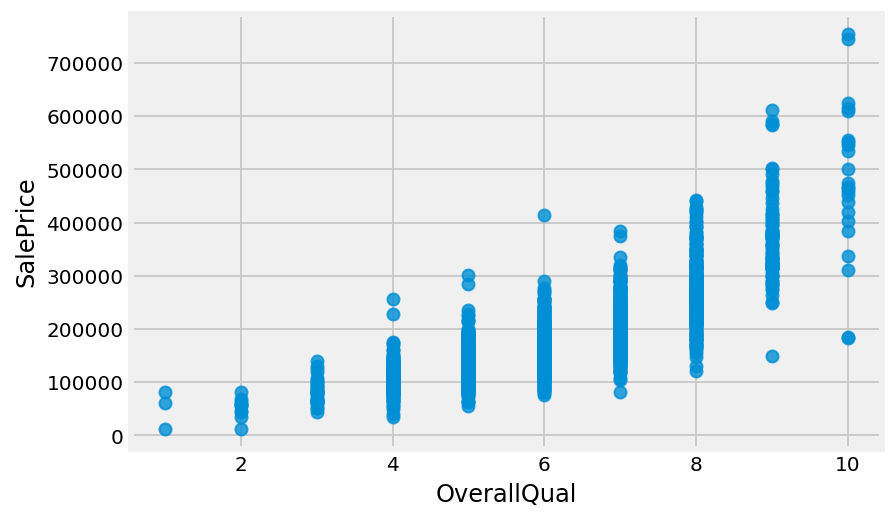

In [27]:
#Overall Quality looks like it should be polynomial 
sns.regplot(x = df['OverallQual'], y = df['SalePrice'], fit_reg=False)

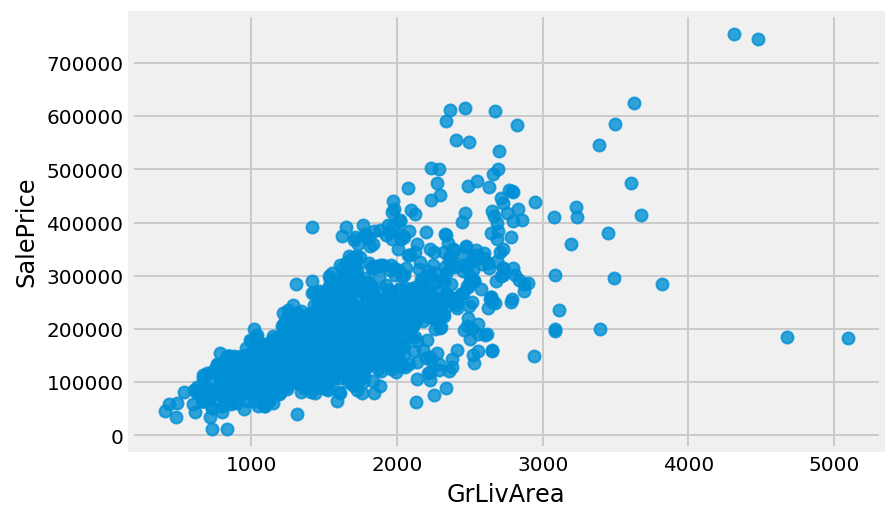

In [28]:
#relatively linear. Tighter relationship for lower above ground sqft (GrLivArea) values (e.g. <1500)
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], fit_reg=False)

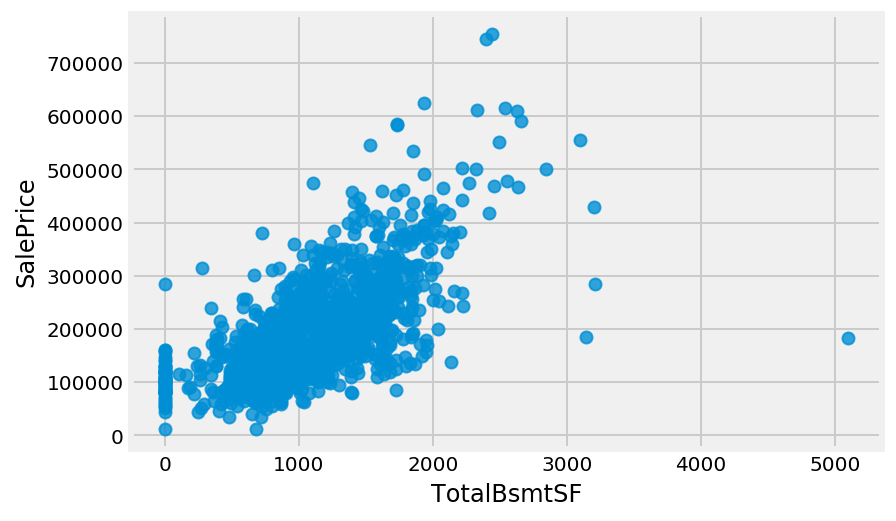

In [29]:
#not a particularly strong relationship. A bit polynomial maybe
sns.regplot(x = df['TotalBsmtSF'], y = df['SalePrice'], fit_reg=False)

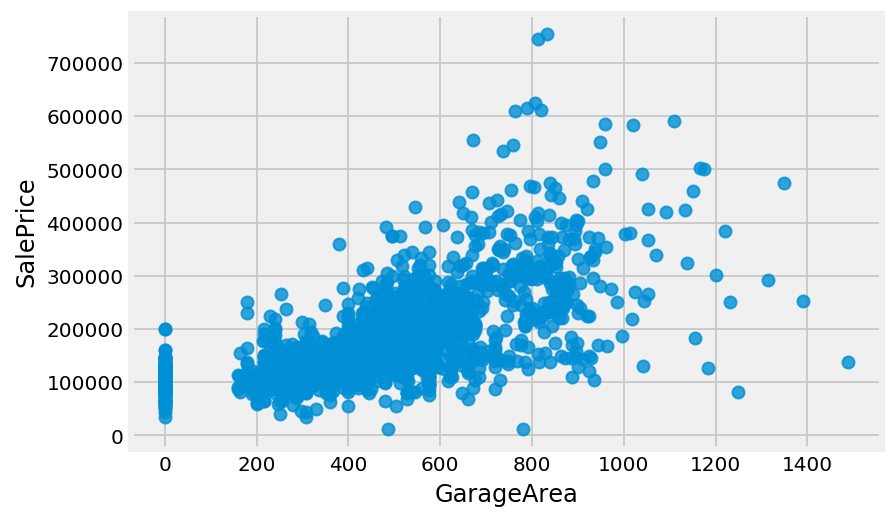

In [30]:
#Garage size is only predictive at/below 800sqft or 3 cars
sns.regplot(x = df['GarageArea'], y = df['SalePrice'], fit_reg=False)

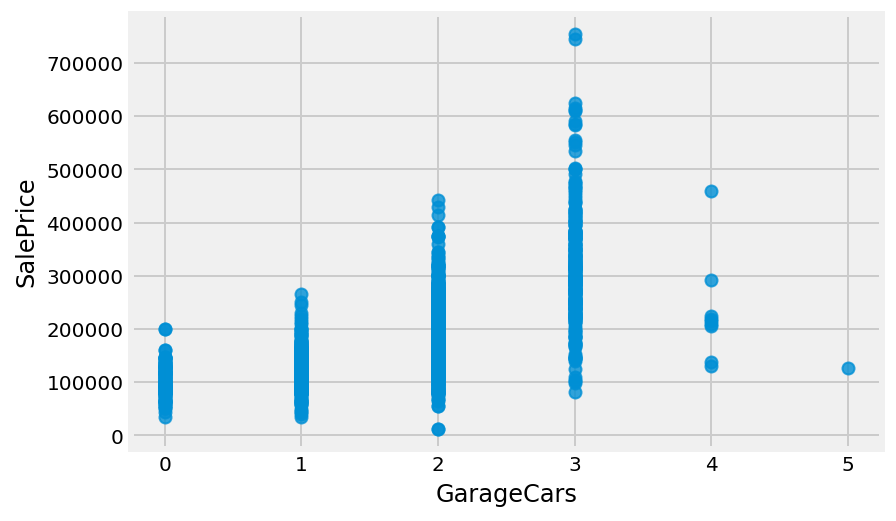

In [31]:
sns.regplot(x = df['GarageCars'], y = df['SalePrice'], fit_reg=False)

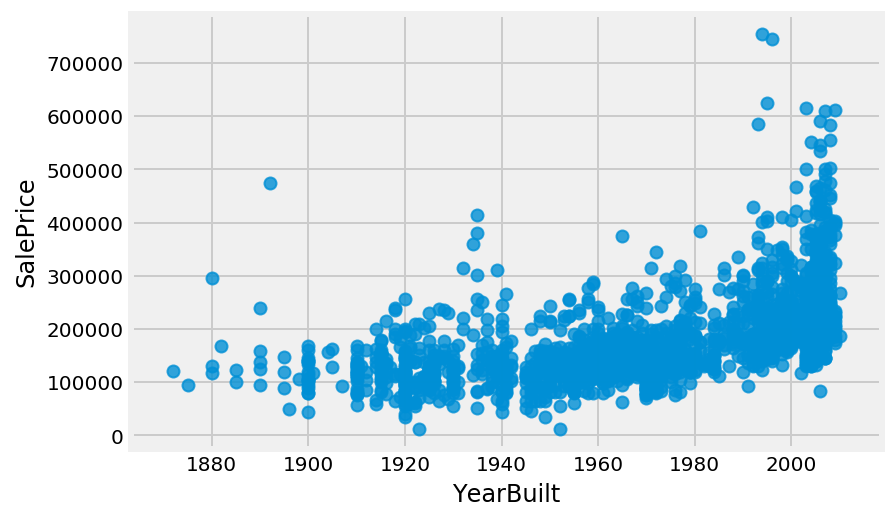

In [32]:
sns.regplot(x = df['YearBuilt'], y = df['SalePrice'], fit_reg=False)

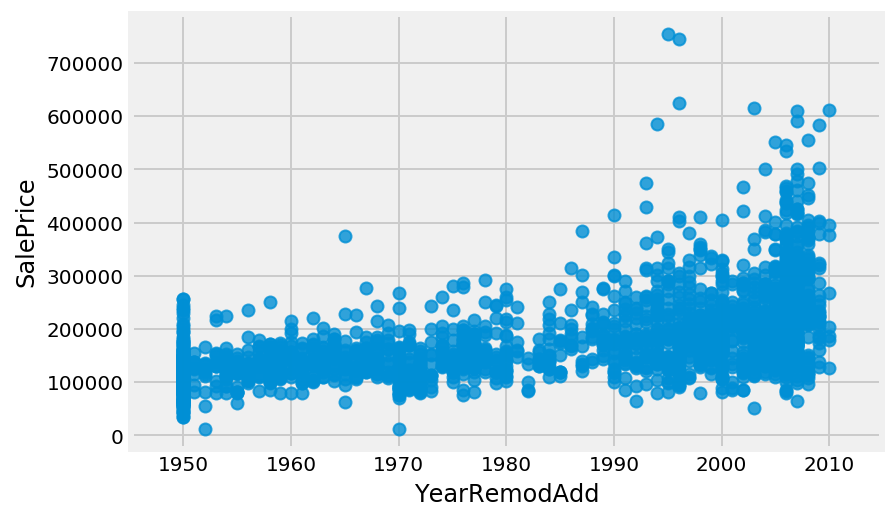

In [33]:
sns.regplot(x = df['YearRemodAdd'], y = df['SalePrice'], fit_reg=False)

##### Eyeball check for multicollinearity

- OverallQual is >0.5 corr with many of these vars (not surprising since it rates overall material and finish of house)


### Regression

In [34]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [35]:
#make a basic regression, then play around with things
X = df[['OverallQual']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.63846039488298256

In [36]:
score = cross_val_score(linreg, Xs, y, cv = 5)
print score
print score.mean(), score.std()
#pretty consistent (low std)

[ 0.60668414  0.64381238  0.63996506  0.63595283  0.65192973]
0.635668827087 0.0154232595316


In [37]:
#create an OverallQual^2 col
df['OverallQual2'] = df['OverallQual'].apply(lambda x: x**2)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000,81
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000,36
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,81
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000,49
4,80,RL,69.0,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000,36


In [38]:
X = df[['OverallQual2']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.6870005805254682

In [39]:
#
X = df.loc[:,['OverallQual','OverallQual2']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.70059959622267232

In [40]:
df['OverallQual3'] = df['OverallQual'].apply(lambda x: x**3)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2,OverallQual3
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000,81,729
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000,36,216
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,81,729
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000,49,343
4,80,RL,69.0,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000,36,216


In [41]:
X = df.loc[:,['OverallQual3']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.70653119926173902

In [42]:
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.71118244853088208

In [43]:
df['OverallQual4'] = df['OverallQual'].apply(lambda x: x**4)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000,81,729,6561
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000,36,216,1296
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,81,729,6561
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000,49,343,2401
4,80,RL,69.0,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000,36,216,1296


In [44]:
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','OverallQual4']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.71122700943828376

Best so far: (OQ, OQ^2, OQ^3) as predictors. OQ^4 doesn't really add

Now: try adding garage or other predictors (still ignoring object vars)

In [45]:
#adding GrLivArea increases R2 by 0.07
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','GrLivArea']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.78873798839611742

In [46]:
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','GarageCars']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.74787705262077275

In [47]:
#GarageArea has a slight bit more effect than GarageCars
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','GarageArea']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.75086060639005492

In [48]:
#YearBuilt and YearRemodAdd don't add much to R2 (just 0.01)
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','YearRemodAdd']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.72154157462152191

In [49]:
#Including GarageArea increases R2 by 0.02
X = df.loc[:,['OverallQual','OverallQual2','OverallQual3','GrLivArea','GarageArea']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.80956712827148614

In [50]:
score = cross_val_score(linreg, Xs, y, cv = 5)
print score
print score.mean(), score.std()

[ 0.74101054  0.85098184  0.80159619  0.82718557  0.80318953]
0.804792733651 0.0366492266123


##### For now, I'll use OverallQual, OverallQual^2, OverallQual^3, GrLivArea, and GarageArea as my predictors

In [51]:
#First predictor zeros out (OverallQual)
lasso = LassoCV()
lasso.fit(Xs, y)
print lasso.score(Xs, y)
print lasso.coef_

0.80648586271
[    -0.         -22716.3127993   68532.70423023  25326.8892241
  14651.94122487]


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [52]:
ridge = RidgeCV()
ridge.fit(Xs, y)
print ridge.score(Xs, y)
print ridge.coef_

0.8095026492
[  76699.87980197 -190845.7014154   161733.24704223   25184.17102852
   14883.13653545]


In [53]:
#based on Lasso result, trying it without OverallQual and R2 is only 0.003 lower so I'll leave OverallQual out
X = df.loc[:,['OverallQual2','OverallQual3','GrLivArea','GarageArea']]
y = df['SalePrice']
ss = StandardScaler()
Xs = ss.fit_transform(X)
linreg = LinearRegression()
linreg.fit(Xs,y)
linreg.score(Xs, y)

0.80664321619189183

##### Make predictions for test set using this final model with OverallQual^2, OverallQual^3, GrLivArea, and GarageArea
GrLivArea and GarageArea are highly correlated with OverallQual, so this could be a potential problem of the model.

In [54]:
#read in test csv 
df_test = pd.read_csv('./test.csv')
df_test.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD
1,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD
2,527163010,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD
3,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD
4,527258010,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New


In [55]:
#OverallQual, GrLivArea, and GarageArea don't have any missing values
df_test.describe()

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,8.790000e+02,879.000000,735.000000,879.000000,879.000000,879.000000,879.000000,879.000000,875.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,839.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,7.183902e+08,57.070535,67.583673,9853.224118,6.062571,5.569966,1971.344710,1985.073948,94.569143,443.466439,57.143345,549.767918,1050.377702,1148.968146,330.307167,2.799772,1482.075085,0.457338,0.059158,1.567691,0.382253,2.846416,1.044369,6.430034,0.597270,1978.303933,1.763367,470.676906,95.134243,49.376564,21.587031,2.055745,15.486917,2.778157,41.577929,6.267349,2007.783845
std,1.887106e+08,42.008672,22.942726,6248.872422,1.350592,1.107773,30.588394,20.533716,167.255325,471.768713,178.246649,442.994908,439.287154,382.063292,418.012276,31.979185,486.880988,0.542237,0.240831,0.572453,0.513556,0.881515,0.206030,1.556618,0.636256,24.920865,0.741528,205.426021,125.718229,72.732765,58.077388,21.342640,55.581556,41.606954,319.527022,2.793209,1.334205
min,5.263020e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284811e+08,20.000000,55.000000,7254.500000,5.000000,5.000000,1953.000000,1968.000000,0.000000,0.000000,0.000000,219.500000,784.000000,864.000000,0.000000,0.000000,1130.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354772e+08,50.000000,65.000000,9157.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,368.000000,0.000000,448.000000,990.000000,1084.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.072013e+08,70.000000,80.000000,11358.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,732.500000,0.000000,769.500000,1298.000000,1375.500000,684.500000,0.000000,1727.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.500000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,9.241001e+08,190.000000,313.000000,115149.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,1721.000000,450.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,690.000000,742.000000,386.000000,320.000000,490.000000,738.000000,6500.000000,12.000000,2010.000000


In [56]:
#make same changes to it where necessary as I did for train data (fillna, add ^2 and ^3 cols)
#don't drop PID since I'll need that for the submission
df_test['OverallQual2'] = df_test['OverallQual'].apply(lambda x: x**2)
df_test['OverallQual3'] = df_test['OverallQual'].apply(lambda x: x**3)
df_test.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,OverallQual2,OverallQual3
0,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,36,216
1,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,64,512
2,527163010,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,36,216
3,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,64,512
4,527258010,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,81,729


In [57]:
#make predictions for SalePrice
X_test = df_test.loc[:,['OverallQual2','OverallQual3','GrLivArea','GarageArea']]
Xs = ss.transform(X_test)

y_preds = linreg.predict(Xs)

print len(y_preds)
print y_preds.mean(), y_preds.std()

879
177478.627348 69532.4788193


In [58]:
#put predictions into a dataframe and then into a csv

results= pd.DataFrame(y_preds)
results.insert(loc = 0, column='PID', value = df_test['PID'])
results.columns = ['PID','SalePrice']
results.head()

,PID,SalePrice
0,527105030,170927.322130
1,527127150,241067.282598
2,527163010,171435.891773
3,527216070,354689.758933
4,527258010,345160.908310


In [59]:
results.to_csv('rehren', index = False)
#score (RMSE) = 36,769

### Classification

##### Classify SaleCondition as Abnormal or not (try using both KNN and logistic reg)

In [60]:
df['SaleCondition'].value_counts()

Normal     1685
Partial     173
Abnorml     137
Family       31
Alloca       17
AdjLand       8
Name: SaleCondition, dtype: int64

In [61]:
#transform SaleCondition column to be 1 if Abnormal and 0 otherwise
df['SaleCondition'] = df['SaleCondition'].apply(lambda x: 1 if x == 'Abnorml' else 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,0,300000,81,729,6561
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,0,166000,36,216,1296
2,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998.0,Unf,0.0,177.0,1175.0,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1.0,0.0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3.0,736.0,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,0,345000,81,729,6561
3,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,0,244000,49,343,2401
4,80,RL,69.0,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,0,208000,36,216,1296


In [62]:
#baseline accuracy = 1914/2051 = 0.9332
df['SaleCondition'].value_counts()

0    1914
1     137
Name: SaleCondition, dtype: int64

In [63]:
#no correlation values with SaleCondition are that high (all <0.2)
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
MSSubClass,1.000000,-0.395849,-0.191761,0.030449,-0.058234,0.011352,0.026634,-0.012715,-0.066433,-0.066988,-0.148856,-0.240346,-0.275103,0.295967,0.034527,0.040779,0.009046,-0.019565,0.122866,0.154346,-0.031229,0.281472,0.019700,-0.061203,0.064078,-0.074782,-0.134634,-0.041047,-0.013396,-0.017218,-0.054824,-0.048619,-0.007846,-0.028252,-0.016217,-0.017017,0.029100,-0.106015,0.017373,0.005172,-0.006041
LotFrontage,-0.395849,1.000000,0.342278,0.189137,-0.071658,0.104283,0.084168,0.203297,0.155343,0.055641,0.114327,0.292210,0.415668,0.031209,0.022435,0.349319,0.092805,-0.003532,0.173988,0.031647,0.222348,0.014278,0.338932,0.233800,0.058110,0.302581,0.325308,0.123077,0.137666,0.020644,0.021125,0.066048,0.158902,0.039526,0.009867,0.017140,0.001354,0.352069,0.206849,0.218406,0.225896
LotArea,-0.191761,0.342278,1.000000,0.077337,-0.042805,0.010820,0.005180,0.114199,0.157380,0.100407,0.028037,0.225372,0.314674,0.034123,0.005328,0.272135,0.114568,0.046170,0.124578,0.024167,0.144710,-0.019187,0.217641,0.252152,-0.019429,0.169406,0.185483,0.136616,0.097348,0.023894,0.014977,0.048635,0.077131,0.077901,0.011708,-0.023275,-0.018170,0.252609,0.086570,0.093608,0.099496
OverallQual,0.030449,0.189137,0.077337,1.000000,-0.088441,0.607435,0.572964,0.436287,0.284793,-0.027254,0.279110,0.556360,0.474645,0.247336,-0.036415,0.571240,0.180924,-0.039905,0.528176,0.276643,0.068347,-0.163811,0.389653,0.401609,0.565243,0.606571,0.562565,0.265658,0.299034,-0.146497,0.011663,0.055259,0.028328,0.011341,0.010482,-0.029027,-0.133140,0.799037,0.986805,0.956560,0.916149
OverallCond,-0.058234,-0.071658,-0.042805,-0.088441,1.000000,-0.362174,0.047107,-0.134374,-0.044578,0.039959,-0.146092,-0.175382,-0.163918,0.015224,0.008049,-0.112847,-0.037457,0.097669,-0.210335,-0.080698,0.000863,-0.058379,-0.083838,-0.046713,-0.328911,-0.177792,-0.146998,0.036038,-0.073109,0.043483,0.064847,0.034791,-0.043663,0.032052,0.008342,0.027282,-0.073244,-0.098810,-0.126160,-0.147237,-0.156853
YearBuilt,0.011352,0.104283,0.010820,0.607435,-0.362174,1.000000,0.626315,0.314873,0.267309,-0.022044,0.161071,0.423369,0.307172,0.012806,-0.152992,0.232565,0.210304,-0.043376,0.483055,0.265138,-0.048997,-0.162115,0.113741,0.163008,0.837275,0.547605,0.484487,0.230235,0.236698,-0.365556,-0.003632,-0.040137,-0.005770,-0.009129,-0.015904,-0.020281,-0.120133,0.550969,0.597833,0.573015,0.539534
YearRemodAdd,0.026634,0.084168,0.005180,0.572964,0.047107,0.626315,1.000000,0.201105,0.146628,-0.066572,0.188927,0.311685,0.246203,0.157438,-0.066282,0.316156,0.124765,-0.045200,0.483701,0.211950,-0.017929,-0.135018,0.206820,0.117201,0.655256,0.422034,0.374859,0.235155,0.249194,-0.230446,0.032546,-0.050466,-0.018948,-0.006370,0.010477,0.017006,-0.157250,0.528435,0.563559,0.540949,0.510449
MasVnrArea,-0.012715,0.203297,0.114199,0.436287,-0.134374,0.314873,0.201105,1.000000,0.321778,-0.005576,0.090455,0.414426,0.416867,0.135719,-0.061431,0.428484,0.159720,0.024247,0.277284,0.206766,0.095450,-0.046682,0.306729,0.271368,0.257088,0.375287,0.376188,0.169094,0.182239,-0.116051,0.000820,0.067933,-0.010151,0.057878,-0.014142,-0.021856,-0.046450,0.528531,0.465240,0.484541,0.496700
BsmtFinSF1,-0.066433,0.155343,0.157380,0.284793,-0.044578,0.267309,0.146628,0.321778,1.000000,-0.045140,-0.473751,0.529413,0.447098,-0.176566,-0.071546,0.189002,0.643014,0.096381,0.079882,-0.030479,-0.114954,-0.088546,0.051326,0.293031,0.184062,0.265135,0.301684,0.222848,0.147585,-0.106144,0.033591,0.109965,0.054530,0.109124,0.002633,0.023779,-0.014443,0.437822,0.302027,0.317623,0.331249
BsmtFi

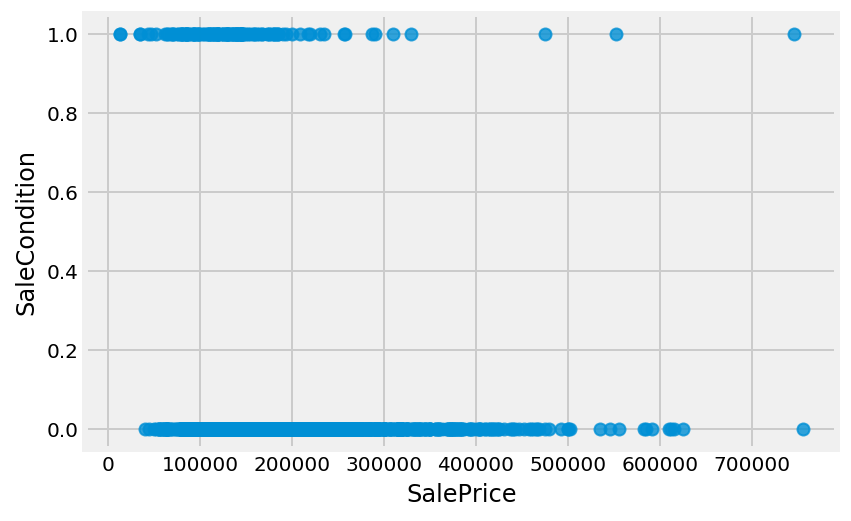

In [64]:
sns.regplot(x = df['SalePrice'], y = df['SaleCondition'], fit_reg=False)

Since correlations are so low, it's unlikely even that there are strong non-linear relationships between (_______) and SaleCondition. I'll try pulling out all houses that have abnormal SaleCondition and see if I can eyeball
any patterns amongst them vs the non-abnormal houses

In [65]:
df_abnorm = df.loc[df['SaleCondition'] == 1]
df_abnorm.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
12,20,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,435.0,BLQ,202.0,565.0,1202.0,GasA,TA,Y,SBrkr,1202,0,0,1202,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1956.0,RFn,1.0,304.0,TA,TA,Y,0,35,120,0,0,0,NaN,GdWo,NaN,0,11,2009,COD,1,120000,25,125,625
18,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,789.0,Unf,0.0,119.0,908.0,GasA,Ex,Y,SBrkr,927,988,0,1915,1.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,Fin,2.0,506.0,TA,TA,Y,120,150,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,1,220000,64,512,4096


In [66]:
df_other = df.loc[df['SaleCondition'] == 0]
df_other.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
0,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,122.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1037.0,Unf,0.0,467.0,1504.0,GasA,Ex,Y,SBrkr,1531,0,0,1531,1.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,700.0,TA,TA,Y,184,52,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,0,300000,81,729,6561
1,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1957,1957,Gable,CompShg,HdBoard,HdBoard,BrkFace,387.0,TA,TA,CBlock,TA,TA,No,Rec,1040.0,Unf,0.0,352.0,1392.0,GasA,TA,Y,FuseA,1392,0,0,1392,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,2.0,458.0,TA,TA,Y,0,0,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,0,166000,36,216,1296


In [67]:
df_abnorm.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,136.000000,136.000000,136.000000,137.000000,137.000000,137.000000,137.000000,136.000000,136.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,114.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000,137.000000,137.000000
mean,62.189781,69.883212,9698.321168,5.394161,5.255474,1957.846715,1971.583942,73.284672,417.970588,58.610294,498.823529,975.404412,1115.649635,308.124088,16.802920,1440.576642,0.397059,0.088235,1.386861,0.284672,2.905109,1.087591,6.321168,0.401460,1967.403509,1.423358,400.875912,62.007299,42.656934,34.489051,2.890511,20.70073,7.788321,15.474453,6.394161,2007.722628,1.0,140558.408759,31.291971,193.583942,1273.598540
std,51.018528,23.175502,4635.933875,1.486991,1.289261,28.276443,19.979270,148.177653,472.154854,172.826317,364.841110,407.729965,416.503488,432.442438,84.591565,598.798254,0.534435,0.284685,0.532035,0.468868,1.042362,0.283737,1.818752,0.658204,25.244195,0.846469,248.084795,102.802173,79.358683,77.968896,23.934862,57.99358,64.275308,91.418324,3.319633,1.370541,0.0,88138.032456,17.221379,168.394392,1591.047354
min,20.000000,21.000000,1533.000000,1.000000,1.000000,1900.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,1.0,12789.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1945.000000,1951.000000,0.000000,0.000000,0.000000,227.250000,726.000000,864.000000,0.000000,0.000000,1054.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1956.000000,1.000000,280.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,2006.000000,1.0,94000.000000,25.000000,125.000000,625.000000
50%,50.000000,69.000000,9179.000000,5.000000,5.000000,1960.000000,1967.000000,0.000000,298.000000,0.000000,446.000000,932.500000,1032.000000,0.000000,0.000000,1292.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1967.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000,2008.000000,1.0,128500.000000,25.000000,125.000000,625.000000
75%,80.000000,80.000000,11475.000000,6.000000,6.000000,1972.000000,1992.000000,95.000000,731.750000,0.000000,722.000000,1129.500000,1258.000000,672.000000,0.000000,1739.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1989.000000,2.000000,540.000000,115.000000,58.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,2009.000000,1.0,154000.000000,36.000000,216.000000,1296.000000
max,190.000000,174.000000,28698.000000,10.000000,8.000000,2008.000000,2008.000000,771.000000,2146.000000,869.000000,1800.000000,2492.000000,2898.000000,2065.000000,515.000000,4476.000000,2.000000,1.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2008.000000,3.000000,1348.000000,486.000000,523.000000,552.000000,216.000000,255.00000,555.000000,650.000000,12.000000,2010.000000,1.0,745000.000000,100.000000,1000.000000,10000.000000


In [68]:
df_other.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1895.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1913.000000,1913.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1818.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.0,1914.000000,1914.000000,1914.000000,1914.000000
mean,57.189133,69.766980,10315.442529,6.159875,5.582027,1972.328631,1984.803553,107.348813,443.997388,45.682863,567.917450,1057.597701,1167.563741,339.776907,4.670846,1512.011494,0.421850,0.060115,1.578892,0.385057,2.854232,1.041275,6.457680,0.614420,1978.726073,1.793103,478.957158,95.389237,47.036050,22.844305,2.817659,15.902299,1.600836,57.311390,6.179728,2007.798328,0.0,184457.137409,39.957158,271.382445,1921.198537
std,42.270737,21.320251,8691.439867,1.419209,1.096881,30.005595,20.790898,186.074315,446.950128,164.513947,442.493516,443.170626,394.413152,432.916173,47.890113,506.381480,0.515739,0.244272,0.543260,0.499457,0.784165,0.211706,1.561942,0.650482,25.687783,0.756940,215.934128,127.931489,63.980225,65.635530,26.791985,56.194600,29.140475,665.936017,2.629219,1.305054,0.0,81233.785024,18.022036,183.401188,1749.333121
min,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.0,40000.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1955.000000,1965.000000,0.000000,0.000000,0.000000,218.250000,798.000000,884.250000,0.000000,0.000000,1138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.0,131000.000000,25.000000,125.000000,625.000000
50%,50.000000,69.000000,9531.500000,6.000000,5.000000,1975.000000,1994.000000,0.000000,375.000000,0.000000,479.500000,996.000000,1089.500000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.0,165000.000000,36.000000,216.000000,1296.000000
75%,70.000000,79.000000,11640.000000,7.000000,6.000000,2001.000000,2004.000000,170.000000,737.000000,0.000000,821.000000,1314.000000,1402.750000,715.500000,0.000000,1761.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.750000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.0,215150.000000,49.000000,343.000000,2401.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2153.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,0.0,755000.000000,100.000000,1000.000000,10000.000000


In [69]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OverallQual2,OverallQual3,OverallQual4
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2032.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.00000,2051.000000,2051.000000,2051.000000,1932.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.523159,69.774744,10274.220868,6.108727,5.560215,1971.361287,1983.920527,105.052165,442.270732,46.540488,563.333659,1052.144878,1164.096051,337.662604,5.481229,1507.239883,0.420205,0.061981,1.566065,0.378352,2.85763,1.044369,6.448562,0.600195,1978.057971,1.768406,473.741589,93.159434,46.743540,23.622136,2.822526,16.222818,2.014139,54.516821,6.194052,2007.793272,0.066797,181524.847879,39.378352,266.185763,1877.941004
std,42.914365,21.443152,8481.882032,1.436247,1.113402,30.104657,20.994146,183.933104,448.592463,165.065855,438.030045,441.289162,396.033247,432.851334,51.225908,513.216615,0.516903,0.247180,0.544506,0.497995,0.80378,0.217483,1.580263,0.653008,25.793804,0.768588,219.031368,126.662226,65.106888,66.572345,26.605367,56.314800,32.693779,643.814839,2.680441,1.309319,0.249730,82422.518806,18.095470,183.430702,1746.353827
min,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,12789.000000,1.000000,1.000000,1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1964.000000,0.000000,0.000000,0.000000,219.000000,796.000000,882.500000,0.000000,0.000000,1124.000000,0.000000,0.000000,1.000000,0.000000,2.00000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,129450.000000,25.000000,125.000000,625.000000
50%,50.000000,69.000000,9520.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,371.500000,0.000000,474.500000,989.500000,1085.000000,0.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,3.00000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,160000.000000,36.000000,216.000000,1296.000000
75%,70.000000,79.000000,11637.000000,7.000000,6.000000,2000.000000,2004.000000,167.250000,737.000000,0.000000,816.000000,1302.000000,1391.500000,711.500000,0.000000,1760.500000,1.000000,0.000000,2.000000,1.000000,3.00000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,213500.000000,49.000000,343.000000,2401.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2153.000000,5095.000000,5095.000000,2065.000000,1064.000000,5095.000000,2.000000,2.000000,3.000000,2.000000,8.00000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,1.000000,755000.000000,100.000000,1000.000000,10000.000000


In [70]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)

In [71]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1918
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         19
MasVnrArea         19
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           59
BsmtCond           59
BsmtExposure       60
BsmtFinType1       59
BsmtFinSF1          1
BsmtFinType2       60
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
X1stFlrSF           0
X2ndFlrSF           0
LowQualFinSF        0
GrLivArea 

Using a KNN model:

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
#first putting all the original cols as predictors except ones that have lots of nulls
train =  [col for col in df.describe().columns if col not in 
              ['PID','LotFrontage','OverallQual2','OverallQual3','OverallQual4','LotFrontage','PoolQC','Fence','MiscFeature',
              'GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Alley']]
df_train = df[train]
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,20,10872,9,5,2006,2006,122.0,1037.0,0.0,467.0,1504.0,1531,0,0,1531,1.0,0.0,2,0,2,1,6,1,2006.0,3.0,700.0,184,52,0,0,0,0,0,2,2009,0,300000
1,20,11900,6,5,1957,1957,387.0,1040.0,0.0,352.0,1392.0,1392,0,0,1392,1.0,0.0,1,1,3,1,6,2,1957.0,2.0,458.0,0,0,0,0,192,0,0,6,2008,0,166000
2,60,11924,9,5,2005,2006,286.0,998.0,0.0,177.0,1175.0,1182,1142,0,2324,1.0,0.0,3,0,4,1,11,2,2005.0,3.0,736.0,147,21,0,0,0,0,0,7,2006,0,345000
3,20,13651,7,6,1973,1973,1115.0,1880.0,0.0,343.0,2223.0,2223,0,0,2223,1.0,0.0,2,0,3,1,8,2,1973.0,2.0,516.0,300,0,0,0,0,0,0,2,2007,0,244000
4,80,13607,6,6,1986,1986,242.0,454.0,0.0,118.0,572.0,1182,800,0,1982,1.0,0.0,2,1,3,1,6,1,1986.0,2.0,501.0,400,112,0,0,0,0,1500,4,2009,0,208000


In [74]:
#drop remaining rows with Null values
df_train.dropna(inplace = True)
df_train.describe()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
mean,57.625616,10252.015271,6.099507,5.564532,1971.093596,1983.751232,105.155665,442.066995,46.852709,562.331527,1051.251232,1162.111823,337.357635,5.537931,1505.007389,0.420197,0.062562,1.561084,0.374877,2.858621,1.044335,6.448276,0.598522,1977.817241,1.766502,473.308374,93.455665,46.269458,23.669458,2.851724,16.390640,2.034975,55.080788,6.188177,2007.796552,0.066995,181059.731527
std,43.007360,8466.339079,1.435297,1.115562,30.089174,20.993455,183.994146,447.763569,165.722697,437.882423,440.512075,390.867408,432.827733,51.487267,511.622806,0.517116,0.248261,0.541945,0.496274,0.803033,0.217529,1.579512,0.652476,24.516409,0.770105,219.367779,126.951991,64.402878,66.647241,26.741137,56.581162,32.861888,647.113968,2.681014,1.311318,0.250075,82314.842538
min,20.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1954.000000,1964.000000,0.000000,0.000000,0.000000,218.250000,795.250000,883.250000,0.000000,0.000000,1120.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,318.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,129050.000000
50%,50.000000,9522.500000,6.000000,5.000000,1972.000000,1992.000000,0.000000,371.500000,0.000000,474.000000,988.500000,1082.500000,0.000000,0.000000,1446.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,479.500000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,160000.000000
75%,70.000000,11625.000000,7.000000,6.000000,2000.000000,2004.000000,167.750000,736.750000,0.000000,815.000000,1300.000000,1389.500000,709.000000,0.000000,1759.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,213000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2153.000000,5095.000000,5095.000000,2065.000000,1064.000000,5095.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,1.000000,755000.000000


In [75]:
X = df_train.drop(['SaleCondition'], axis = 1)

y = df_train['SaleCondition'].values

In [76]:
print X.shape
print y.shape

(2030, 36)
(2030,)


In [77]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [78]:
knn = KNeighborsClassifier()
knn.fit(Xs, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
#score is 93.45% vs 93.3% baseline (so not really any good)
knn.score(X, y)

0.93300492610837438

In [80]:
1- np.mean(y)

0.93300492610837438

##### Gridsearch to find the optimal 'k' 

In [81]:
#Gridsearch to find the optimal 'k'
from sklearn.model_selection import GridSearchCV

In [82]:
knn_params = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)

#Find optimal set
knn_gridsearch.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
#93.45% so no better than what I got before (and this was after fiddling with the set of n_neighbours to test)
knn_gridsearch.best_score_

0.93448275862068964

In [84]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [85]:
#saving the best model so I can use it on the test data
best_knn = knn_gridsearch.best_estimator_

Best params are Manhattan distance, 12 neighbours, and "distance" as the weights BUT the best_score is actually identical to the score I got when I just ran the (default) knn at the beginning

##### Bring in test data and use KNN model with 12 neighbours and the same set of predictors (X) to predict the SaleCondition of these houses

In [86]:
df_test2 = pd.read_csv('./test.csv')
df_test2.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD
1,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD
2,527163010,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD
3,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD
4,527258010,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New


In [87]:
df_test2.isnull().sum()

PID                0
MSSubClass         0
MSZoning           0
LotFrontage      144
LotArea            0
Street             0
Alley            814
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         4
MasVnrArea         4
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          21
BsmtCond          21
BsmtExposure      23
BsmtFinType1      21
BsmtFinSF1         0
BsmtFinType2      21
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
X1stFlrSF          0
X2ndFlrSF          0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [88]:
test =  [col for col in df_test2.describe().columns if col not in 
              ['LotFrontage','PoolQC','Fence','MiscFeature',
              'GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Alley']]

df_testset = df_test2[test]
df_testset.head()

,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,527105030,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
1,527127150,120,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,1.0,0.0,2,0,2,1,6,0,2001.0,2.0,582.0,0,0,170,0,0,0,0,4,2010
2,527163010,60,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,763.0,763,892,0,1655,0.0,0.0,2,1,3,1,7,1,1993.0,2.0,440.0,157,84,0,0,0,0,0,4,2010
3,527216070,60,53504,8,5,2003,2003,603.0,1416.0,0.0,234.0,1650.0,1690,1589,0,3279,1.0,0.0,3,1,4,1,12,1,2003.0,3.0,841.0,503,36,0,0,210,0,0,6,2010
4,527258010,20,11394,9,2,2010,2010,350.0,1445.0,0.0,411.0,1856.0,1856,0,0,1856,1.0,0.0,1,1,1,1,8,1,2010.0,3.0,834.0,113,0,0,0,0,0,0,6,2010


In [89]:
df_testset.describe()

,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,8.790000e+02,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,875.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,839.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,7.183902e+08,57.070535,9853.224118,6.062571,5.569966,1971.344710,1985.073948,94.569143,443.466439,57.143345,549.767918,1050.377702,1148.968146,330.307167,2.799772,1482.075085,0.457338,0.059158,1.567691,0.382253,2.846416,1.044369,6.430034,0.597270,1978.303933,1.763367,470.676906,95.134243,49.376564,21.587031,2.055745,15.486917,2.778157,41.577929,6.267349,2007.783845
std,1.887106e+08,42.008672,6248.872422,1.350592,1.107773,30.588394,20.533716,167.255325,471.768713,178.246649,442.994908,439.287154,382.063292,418.012276,31.979185,486.880988,0.542237,0.240831,0.572453,0.513556,0.881515,0.206030,1.556618,0.636256,24.920865,0.741528,205.426021,125.718229,72.732765,58.077388,21.342640,55.581556,41.606954,319.527022,2.793209,1.334205
min,5.263020e+08,20.000000,1300.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284811e+08,20.000000,7254.500000,5.000000,5.000000,1953.000000,1968.000000,0.000000,0.000000,0.000000,219.500000,784.000000,864.000000,0.000000,0.000000,1130.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354772e+08,50.000000,9157.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,368.000000,0.000000,448.000000,990.000000,1084.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.072013e+08,70.000000,11358.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,732.500000,0.000000,769.500000,1298.000000,1375.500000,684.500000,0.000000,1727.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.500000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,9.241001e+08,190.000000,115149.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,1721.000000,450.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,690.000000,742.000000,386.000000,320.000000,490.000000,738.000000,6500.000000,12.000000,2010.000000


In [90]:
df_testset['MasVnrArea'].fillna(df_testset['MasVnrArea'].median(), inplace = True)
df_testset['GarageYrBlt'].fillna(df_testset['GarageYrBlt'].median(), inplace = True)

/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [91]:
print X.shape
print y.shape

(2030, 36)
(2030,)


In [98]:
X_testing = df_testset 
ss = StandardScaler()
Xs_test = ss.fit_transform(X_testing)

In [97]:
print Xs.shape
print Xs_test.shape

(2030, 36)
(879, 36)


In [100]:
best_knn = KNeighborsClassifier(n_neighbors=12)

#I didn't think I should put this 'fit' step in but it wouldn't work without it. I suspect it's why I'm getting all 0's
best_knn.fit(Xs, y)

y_predicted = best_knn.predict(Xs_test)

y_predicted.mean()
#obviously something's wrong because the mean shouldn't be zero (i.e. it shouldn't be predicting 0's for all)

0.0

In [106]:
results2= pd.DataFrame(y_predicted)
results2.insert(loc = 0, column='PID', value = df_testset['PID'])
results2.columns = ['PID','SaleCondition']
results2.head()

,PID,SaleCondition
0,527105030,0
1,527127150,0
2,527163010,0
3,527216070,0
4,527258010,0


In [107]:
results2.to_csv('rehren2', index = False)

##### Try a logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logreg = LogisticRegression()

X_reg = df_train.drop(['SaleCondition'], axis = 1)
y_reg = df_train['SaleCondition']

logreg.fit(X,y)
print logreg.intercept_
print logreg.coef_

[  3.42869113e-07]
[[  3.30239886e-04  -6.73886311e-06  -8.98471186e-05  -5.67476352e-04
    1.84479882e-03  -6.52746114e-03  -1.62200282e-04   4.07411646e-04
    4.39846785e-04  -2.89484364e-04   5.57774067e-04   1.54084170e-04
    2.72550719e-05   8.95065281e-04   1.07640452e-03   2.29020436e-05
    4.62278003e-05  -1.19064576e-04  -1.81789016e-05  -2.49463361e-05
   -1.35086074e-05  -7.03752531e-05  -2.07818350e-04   3.41347649e-03
   -1.68891427e-04   3.82095606e-05  -8.89279518e-04   1.10404296e-03
    4.84346130e-04   1.81076887e-03   2.59213495e-03   3.01659020e-03
   -9.52857215e-04   5.25062115e-04   3.80280234e-04  -2.00944265e-05]]


In [123]:
#Cross val
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [124]:
scores = cross_val_score(logreg, X_reg, y_reg, cv=5)
print scores.mean(), scores.std()

0.931528136586 0.00237949463655


In [126]:
gs_params = {
    'penalty':['l1','l2'], #Lasso, Ridge
    'solver':['liblinear'], #note: liblinear is the default so if we didn't include this line here, it'd still work
    'C':np.logspace(-5,0,100) #the regularization strength
}
logreg_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)

In [127]:
logreg_gridsearch.fit(X_reg, y_reg)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   52.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [128]:
logreg_gridsearch.best_score_

0.93300492610837438

In [130]:
logreg_gridsearch.best_params_ 
#lasso was chosen but 'C' is essentially zero so it doesn't really matter

{'C': 1.0000000000000001e-05, 'penalty': 'l1', 'solver': 'liblinear'}

In [131]:
X_testing = df_testset 
ss = StandardScaler()
Xs_test = ss.fit_transform(X_testing)

In [134]:
#now use Logreg on X_testing
y_predictions = logreg.predict(Xs_test)
y_predictions.mean() 
#terrible! (mean is .436)

0.43572241183162685

In [135]:
results3= pd.DataFrame(y_predictions)
results3.insert(loc = 0, column='PID', value = df_testset['PID'])
results3.columns = ['PID','SaleCondition']
results3.head()

,PID,SaleCondition
0,527105030,0
1,527127150,0
2,527163010,0
3,527216070,1
4,527258010,0


In [136]:
results3.to_csv('rehren3', index = False)

A couple obvious things to add to make this better
- don't ignore categorical variables (make them dummies or numbers if there's an implied ranking and explore their predictive power)
- deal with missing values rather than ignoring cols that are problematic due to their missing values
